In [67]:
#Atharva Paudel
#Level5 Group18
#StudentID: 2408865
#Herald

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
%cd /content/drive/MyDrive/Assignment1(AI)





/content/drive/MyDrive/Assignment1(AI)


In [69]:
import pandas as pd

file_path = 'WHR-2024-5CS037 (3).csv'
df = pd.read_csv(file_path)

print("First 10 rows of the dataset:")
print(df.head(10))


First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [70]:
# Step 4: Dataset Overview

# Number of rows and columns
num_rows, num_columns = df.shape
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

# List all columns and their data types
print("\nColumns and data types:")
print(df.dtypes)


The dataset contains 143 rows and 9 columns.

Columns and data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [71]:
# Step 5: Basic Statistics

# Calculate mean, median, and standard deviation for the 'Score' column
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print(f"\nMean Score: {mean_score:.2f}")
print(f"Median Score: {median_score:.2f}")
print(f"Standard Deviation of Score: {std_score:.2f}")

# Identify the country with the highest and lowest happiness scores
highest_score_country = df.loc[df['score'].idxmax(), 'Country name']
lowest_score_country = df.loc[df['score'].idxmin(), 'Country name']

print(f"\nCountry with the highest score: {highest_score_country}")
print(f"Country with the lowest score: {lowest_score_country}")



Mean Score: 5.53
Median Score: 5.79
Standard Deviation of Score: 1.17

Country with the highest score: Finland
Country with the lowest score: Afghanistan


In [72]:
# Step 6: Missing Values

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])



Missing values in each column:
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [73]:
# Step 7: Filtering and Sorting

# Filter countries with a Score > 7.5
high_score_countries = df[df['score'] > 7.5]

# Sort the filtered dataset by GDP per Capita in descending order
sorted_high_score_countries = high_score_countries.sort_values(
    by='Log GDP per capita', ascending=False
)

print("\nTop 10 countries with a Score > 7.5 sorted by GDP per Capita:")
print(sorted_high_score_countries.head(10))



Top 10 countries with a Score > 7.5 sorted by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [74]:
# Step 8: Adding New Columns

# Define happiness categories
def happiness_category(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

# Apply the function to create a new column
df['Happiness Category'] = df['score'].apply(happiness_category)

# Display the first few rows to verify
print("\nDataset with 'Happiness Category' column added:")
print(df[['Country name', 'score', 'Happiness Category']].head(10))



Dataset with 'Happiness Category' column added:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


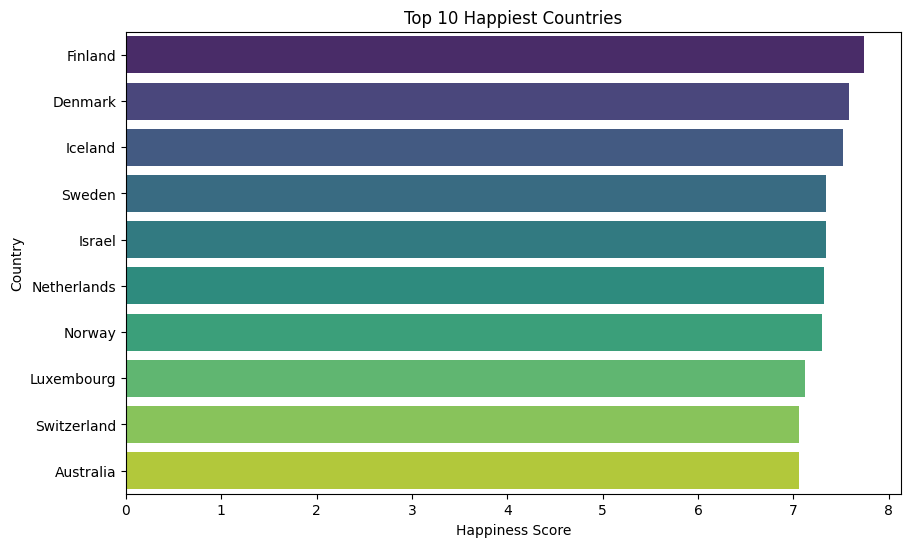

In [75]:
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis', hue='Country name')
plt.title("Top 10 Happiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()


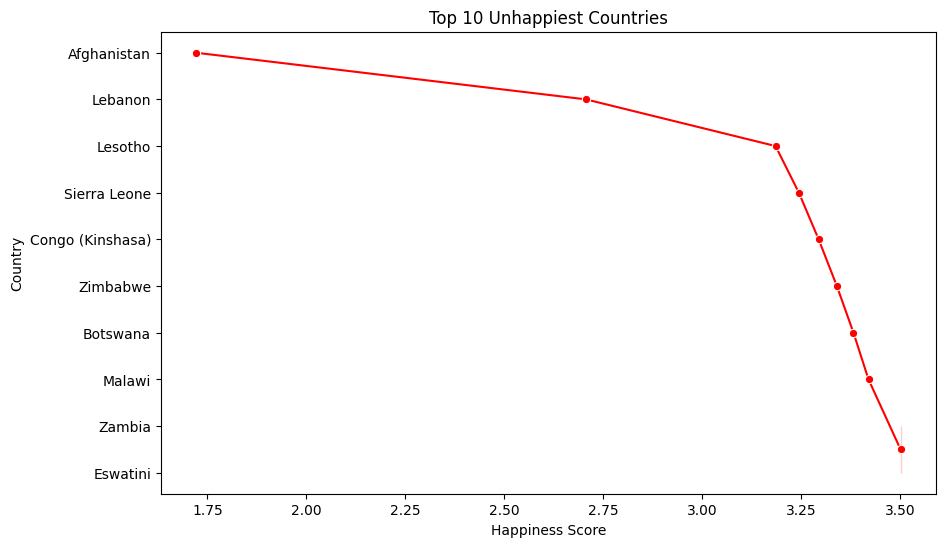

In [76]:
# Step 9.2: Line Plot

import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns;

top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
sns.lineplot(x='score', y='Country name', marker='o', data=top_10_unhappiest, color='red')
plt.title("Top 10 Unhappiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()


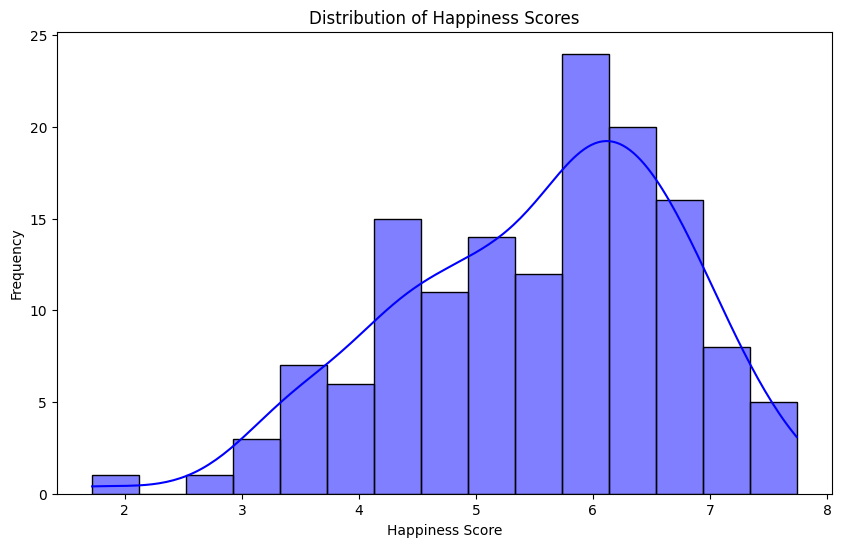

In [ ]:
# Step 9.3: Histogram

plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=15, kde=True, color='blue')
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()


   score Happiness Category
0  7.741               High
1  7.583               High
2  7.525               High
3  7.344               High
4  7.341               High


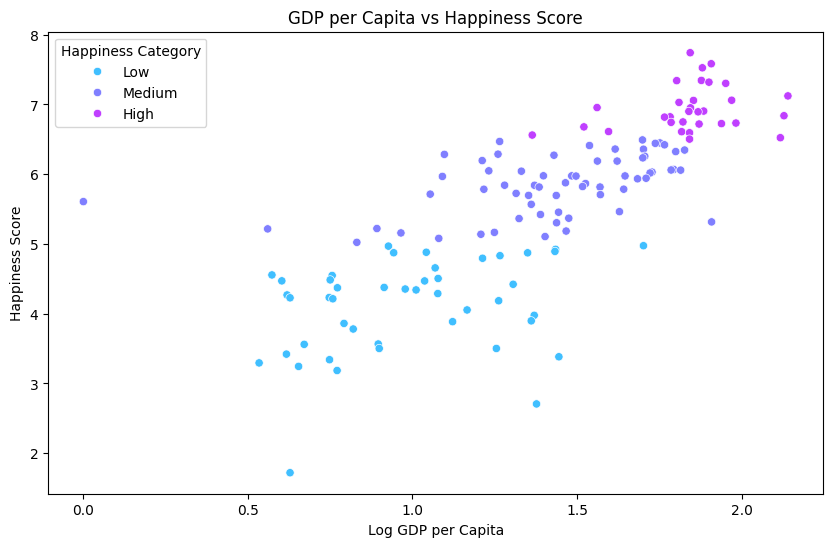

In [ ]:
# Categorize Happiness Score into High, Medium, and Low
# Adjust thresholds as appropriate for your dataset
conditions = [
    df['score'] >= 6.5,  # High Happiness
    (df['score'] < 6.5) & (df['score'] >= 5.0),  # Medium Happiness
    df['score'] < 5.0  # Low Happiness
]
categories = ['High', 'Medium', 'Low']

# Create the 'Happiness Category' column
df['Happiness Category'] = pd.cut(
    df['score'], bins=[0, 5.0, 6.5, 10], labels=['Low', 'Medium', 'High'], include_lowest=True
)

# Ensure the column is correctly created
print(df[['score', 'Happiness Category']].head())

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', hue='Happiness Category', data=df, palette='cool')
plt.title("GDP per Capita vs Happiness Score")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend(title="Happiness Category")
plt.show()


In [ ]:
#Problem 2
#Task1

# Define South Asian countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter the dataset for South Asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]

# Save the filtered dataframe as a new CSV
south_asia_df.to_csv("South_Asia_Happiness.csv", index=False)

print("\nSouth Asia Dataset:")
print(south_asia_df)



South Asia Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions o


Top 5 South Asian Countries by Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774


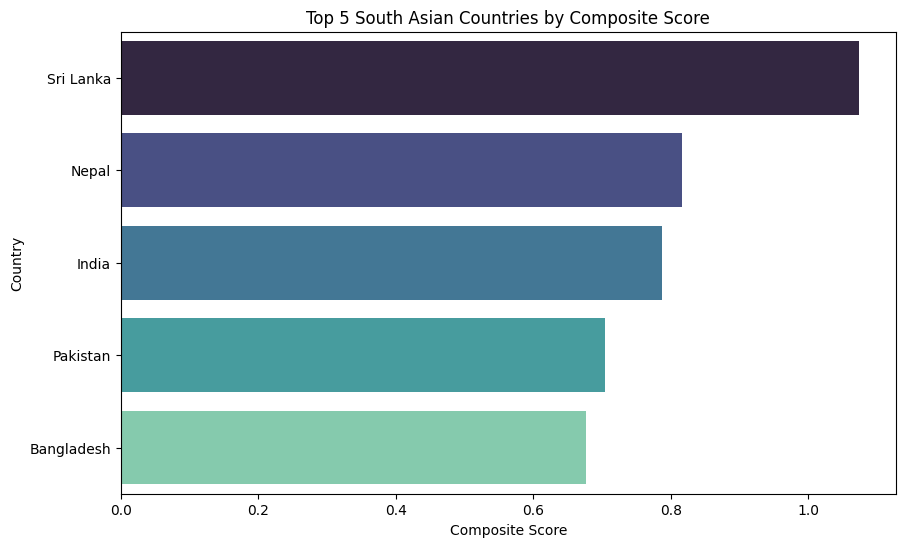

In [ ]:
#Problem2
#Task2

# Ensure we're working with a copy of the DataFrame
south_asia_df = south_asia_df.copy()

# Calculate Composite Score
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

# Rank countries by Composite Score
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

# Display the top 5 countries
print("\nTop 5 South Asian Countries by Composite Score:")
print(south_asia_df[['Country name', 'Composite Score']].head(5))

# Visualize the top 5 countries
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Composite Score',
    y='Country name',
    data=south_asia_df.head(5),
    hue='Country name',  # Assign the y variable to hue
    dodge=False,
    palette='mako'
)
plt.legend([], [], frameon=False)  # Remove the legend if unnecessary
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.show()



Outliers in South Asia:
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  
142                      0.088                0.672                Low  


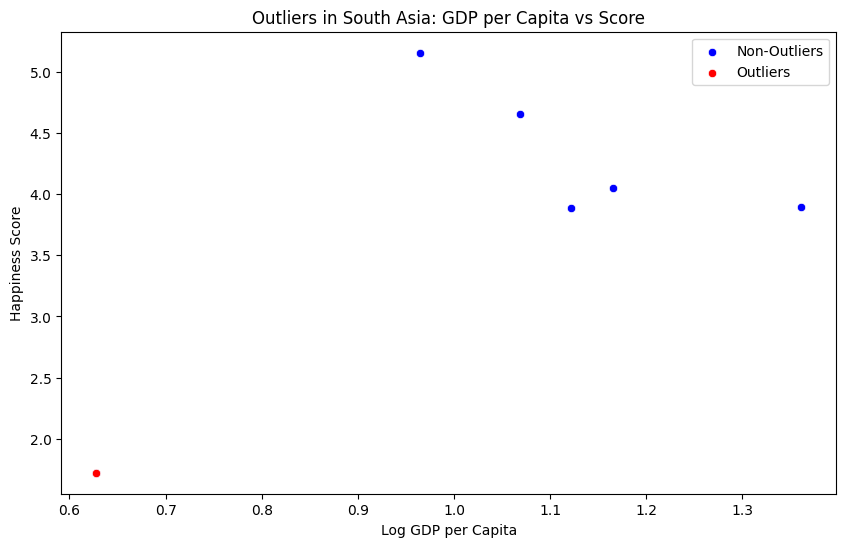

In [ ]:
#PROBLEM2
#TASK3

south_asia_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives',
    'Nepal', 'Pakistan', 'Sri Lanka'
]

# Filter the dataset
south_asia_df = df[df['Country name'].isin(south_asia_countries)]

# Calculate IQR for Score and GDP per Capita
score_iqr = south_asia_df['score'].quantile(0.75) - south_asia_df['score'].quantile(0.25)
gdp_iqr = south_asia_df['Log GDP per capita'].quantile(0.75) - south_asia_df['Log GDP per capita'].quantile(0.25)

# Define thresholds
score_upper = south_asia_df['score'].quantile(0.75) + 1.5 * score_iqr
score_lower = south_asia_df['score'].quantile(0.25) - 1.5 * score_iqr

gdp_upper = south_asia_df['Log GDP per capita'].quantile(0.75) + 1.5 * gdp_iqr
gdp_lower = south_asia_df['Log GDP per capita'].quantile(0.25) - 1.5 * gdp_iqr

# Identify outliers
outliers = south_asia_df[
    (south_asia_df['score'] > score_upper) | (south_asia_df['score'] < score_lower) |
    (south_asia_df['Log GDP per capita'] > gdp_upper) | (south_asia_df['Log GDP per capita'] < gdp_lower)
]

print("\nOutliers in South Asia:")
print(outliers)

# Scatter plot with outliers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita', y='score', data=south_asia_df, label="Non-Outliers", color='blue'
)
sns.scatterplot(
    x='Log GDP per capita', y='score', data=outliers, label="Outliers", color='red'
)
plt.title("Outliers in South Asia: GDP per Capita vs Score")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()



Correlation with Score:
Freedom to make life choices: 0.80
Generosity: 0.87


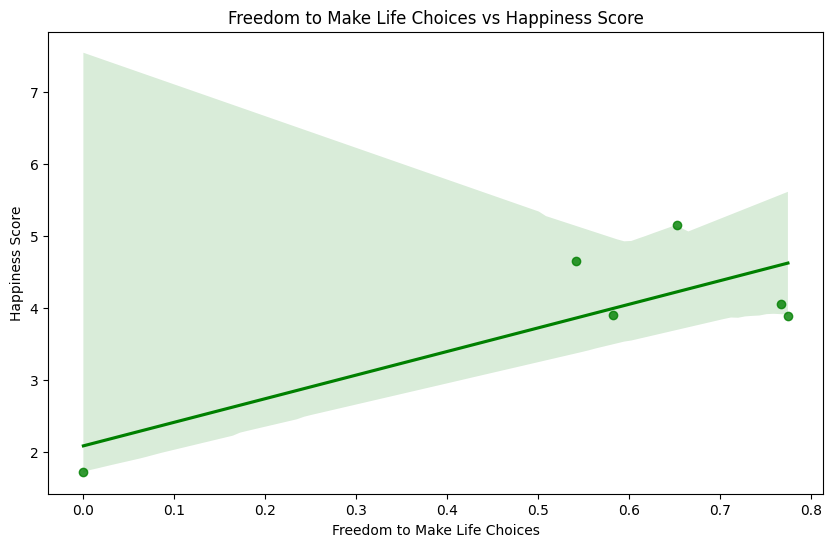

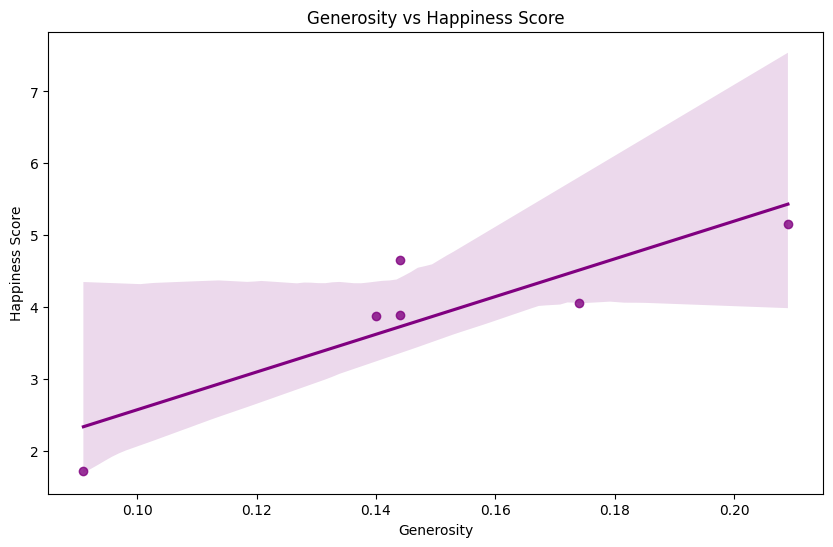

In [ ]:
#Problem 2
#Task4


# Calculate correlation
freedom_corr = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
generosity_corr = south_asia_df['Generosity'].corr(south_asia_df['score'])

print(f"\nCorrelation with Score:")
print(f"Freedom to make life choices: {freedom_corr:.2f}")
print(f"Generosity: {generosity_corr:.2f}")

# Scatter plots with trendlines
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Freedom to make life choices', y='score', data=south_asia_df, color='green'
)
plt.title("Freedom to Make Life Choices vs Happiness Score")
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Happiness Score")
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(
    x='Generosity', y='score', data=south_asia_df, color='purple'
)
plt.title("Generosity vs Happiness Score")
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.show()



Countries with Largest Positive Gaps:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Countries with Largest Negative Gaps:
    Country name  GDP-Score Gap
125        India         -2.888
107     Pakistan         -3.588
92         Nepal         -4.193


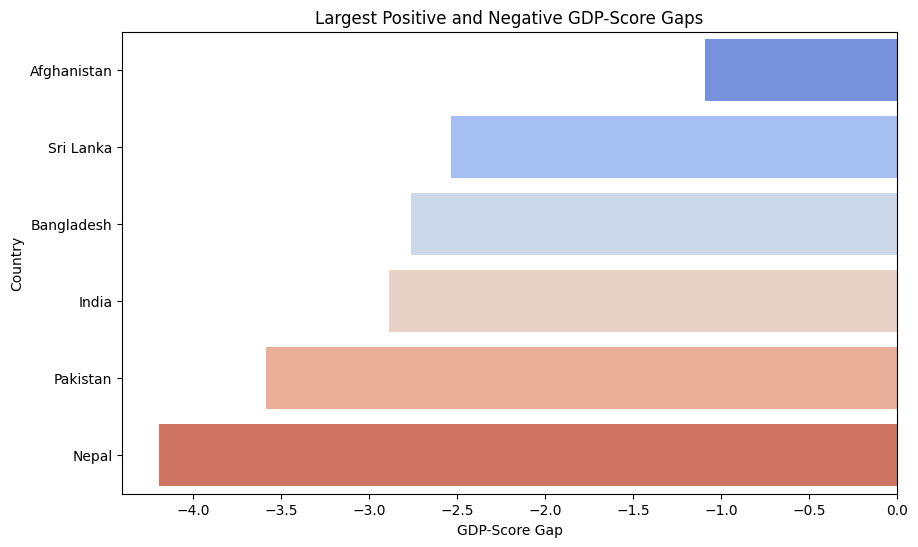

In [63]:
#Problem2
#Task5

# Calculate GDP-Score Gap
south_asia_df.loc[:, 'GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Rank countries by gap
gap_sorted = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

# Highlight the top 3 countries with largest positive and negative gaps
largest_positive_gaps = gap_sorted.head(3)
largest_negative_gaps = gap_sorted.tail(3)

print("\nCountries with Largest Positive Gaps:")
print(largest_positive_gaps[['Country name', 'GDP-Score Gap']])

print("\nCountries with Largest Negative Gaps:")
print(largest_negative_gaps[['Country name', 'GDP-Score Gap']])

# Bar chart for gaps
plt.figure(figsize=(10, 6))
sns.barplot(
    x='GDP-Score Gap', y='Country name', data=pd.concat([largest_positive_gaps, largest_negative_gaps]),
    palette='coolwarm', hue='Country name', legend=False
)
plt.title("Largest Positive and Negative GDP-Score Gaps")
plt.xlabel("GDP-Score Gap")
plt.ylabel("Country")
plt.show()


In [ ]:
#Problem 3
#Task1


# Define Middle Eastern countries
#
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine",
    "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

# Filter the dataset for Middle Eastern countries
middle_east_df = df[df['Country name'].isin(middle_east_countries)]

# Save the filtered dataframe as a new CSV
middle_east_df.to_csv("Middle_East_Happiness.csv", index=False)

print("\nMiddle Eastern Dataset:")
print(middle_east_df)



Middle Eastern Dataset:
             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661      

In [ ]:
#Problem 3
#Task2



# Calculate mean and standard deviation for both regions
sa_mean = south_asia_df['score'].mean()
sa_std = south_asia_df['score'].std()

me_mean = middle_east_df['score'].mean()
me_std = middle_east_df['score'].std()

print("\nDescriptive Statistics:")
print(f"South Asia - Mean: {sa_mean:.2f}, Standard Deviation: {sa_std:.2f}")
print(f"Middle East - Mean: {me_mean:.2f}, Standard Deviation: {me_std:.2f}")

# Determine which region has higher happiness scores on average
higher_region = "South Asia" if sa_mean > me_mean else "Middle East"
print(f"\nThe region with higher happiness scores on average is: {higher_region}")



Descriptive Statistics:
South Asia - Mean: 3.90, Standard Deviation: 1.18
Middle East - Mean: 5.41, Standard Deviation: 1.57

The region with higher happiness scores on average is: Middle East


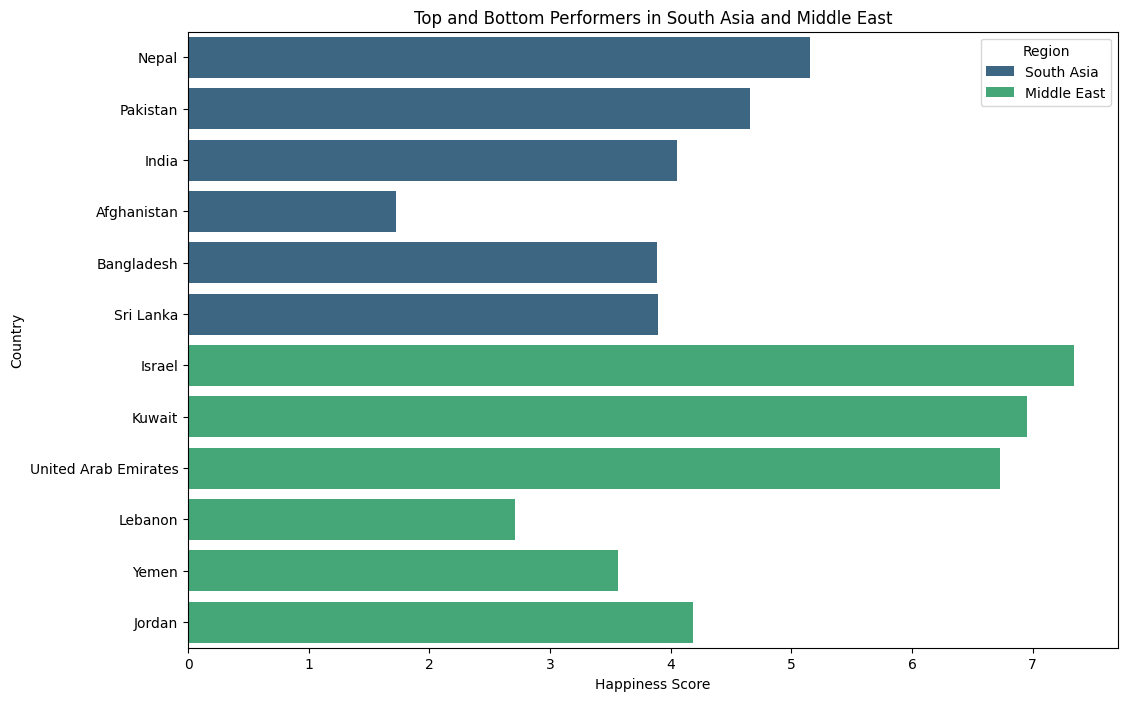

In [ ]:
#Problem 3
#Task3

# Top 3 and bottom 3 countries in South Asia
sa_top3 = south_asia_df.nlargest(3, 'score')
sa_bottom3 = south_asia_df.nsmallest(3, 'score')

# Top 3 and bottom 3 countries in Middle East
me_top3 = middle_east_df.nlargest(3, 'score')
me_bottom3 = middle_east_df.nsmallest(3, 'score')

# Combine for visualization
comparison_df = pd.concat([
    sa_top3.assign(Region='South Asia'),
    sa_bottom3.assign(Region='South Asia'),
    me_top3.assign(Region='Middle East'),
    me_bottom3.assign(Region='Middle East')
])

# Bar plot for comparison
plt.figure(figsize=(12, 8))
sns.barplot(
    x='score', y='Country name', hue='Region', data=comparison_df,
    palette='viridis'
)
plt.title("Top and Bottom Performers in South Asia and Middle East")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.legend(title="Region")
plt.show()


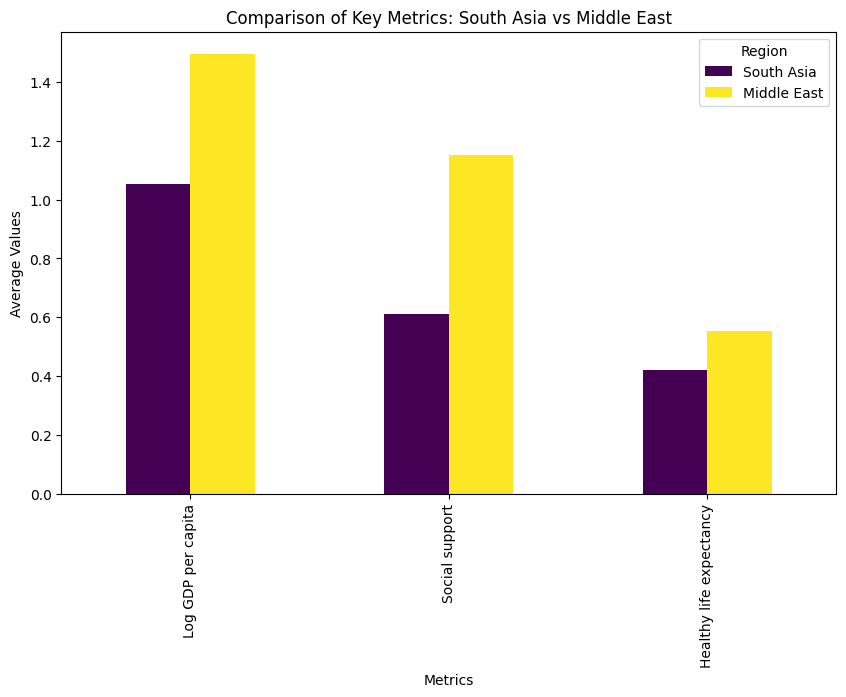

In [ ]:
#Problem 3
#Task4

# Metrics to compare
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Grouped bar chart
comparison_metrics = pd.concat([
    south_asia_df[metrics].mean().rename('South Asia'),
    middle_east_df[metrics].mean().rename('Middle East')
], axis=1)

comparison_metrics.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Comparison of Key Metrics: South Asia vs Middle East")
plt.ylabel("Average Values")
plt.xlabel("Metrics")
plt.legend(title="Region")
plt.show()


In [64]:
#Problem 3
#Task5

# Calculate range and CV for both regions
sa_range = south_asia_df['score'].max() - south_asia_df['score'].min()
me_range = middle_east_df['score'].max() - middle_east_df['score'].min()

sa_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()
me_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print("\nHappiness Disparity:")
print(f"South Asia - Range: {sa_range:.2f}, Coefficient of Variation: {sa_cv:.2f}")
print(f"Middle East - Range: {me_range:.2f}, Coefficient of Variation: {me_cv:.2f}")



Happiness Disparity:
South Asia - Range: 3.44, Coefficient of Variation: 0.30
Middle East - Range: 4.63, Coefficient of Variation: 0.29


In [65]:
#Problem 3
#Task6


# Correlation for South Asia
sa_freedom_corr = south_asia_df['Freedom to make life choices'].corr(south_asia_df['score'])
sa_generosity_corr = south_asia_df['Generosity'].corr(south_asia_df['score'])

# Correlation for Middle East
me_freedom_corr = middle_east_df['Freedom to make life choices'].corr(middle_east_df['score'])
me_generosity_corr = middle_east_df['Generosity'].corr(middle_east_df['score'])

print("\nCorrelation Analysis:")
print(f"South Asia - Freedom: {sa_freedom_corr:.2f}, Generosity: {sa_generosity_corr:.2f}")
print(f"Middle East - Freedom: {me_freedom_corr:.2f}, Generosity: {me_generosity_corr:.2f}")



Correlation Analysis:
South Asia - Freedom: 0.80, Generosity: 0.87
Middle East - Freedom: 0.86, Generosity: 0.63


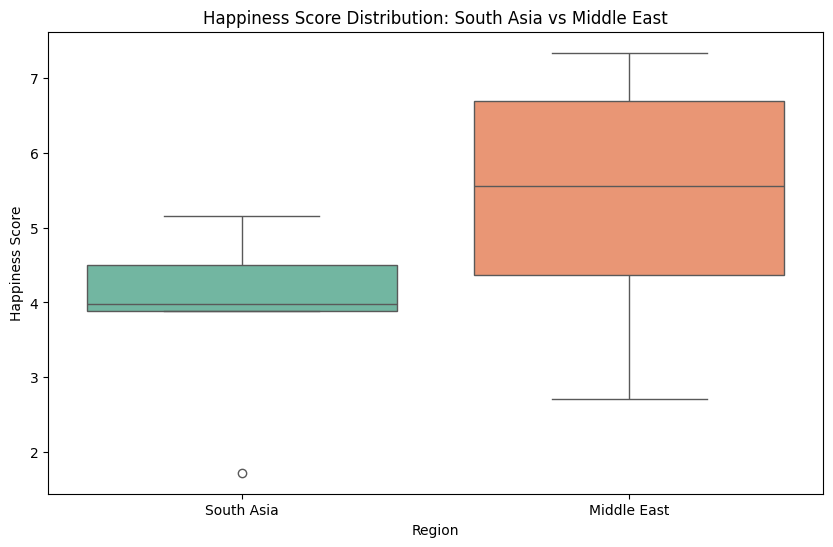

In [77]:
#Problem 3
#Task7

# Combine datasets for boxplot
boxplot_df = pd.concat([
    south_asia_df[['score']].assign(Region='South Asia'),
    middle_east_df[['score']].assign(Region='Middle East')
])

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Region', y='score', data=boxplot_df, palette='Set2', hue='Region', legend=False
)
plt.title("Happiness Score Distribution: South Asia vs Middle East")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.show()
